In [104]:
import cv2
import matplotlib.pyplot as plt

imgl = cv2.imread('frame0000_l.jpg',0)
imgr = cv2.imread('frame0000_r.jpg',0)

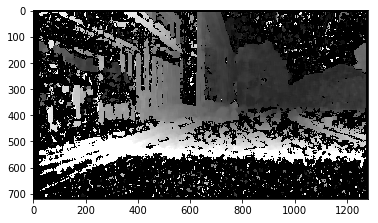

In [115]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgl,imgr)
plt.imshow(disparity,'gray')
plt.show()


/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


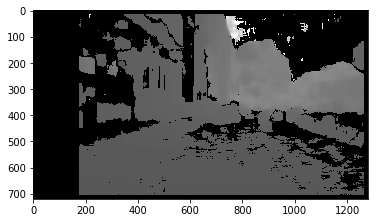

In [106]:

f = 1400
b = 120

D = (b * f) / disparity
plt.imshow(D, 'gray')
plt.show()


In [107]:
D[497,500]

819.5121951219512

In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [116]:
imgL = cv2.imread('frame0000_l.jpg',0)
imgR = cv2.imread('frame0000_r.jpg',0)

# SGBM Parameters -----------------
window_size = 7                     # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
 
left_matcher = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=160,             # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=5,
    P1=8 * 3 * window_size ** 2,    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

In [117]:

right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

# FILTER Parameters
lmbda = 80000
sigma = 1.2
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

print('computing disparity...')
displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
displ = np.int16(displ)
dispr = np.int16(dispr)
filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!


computing disparity...


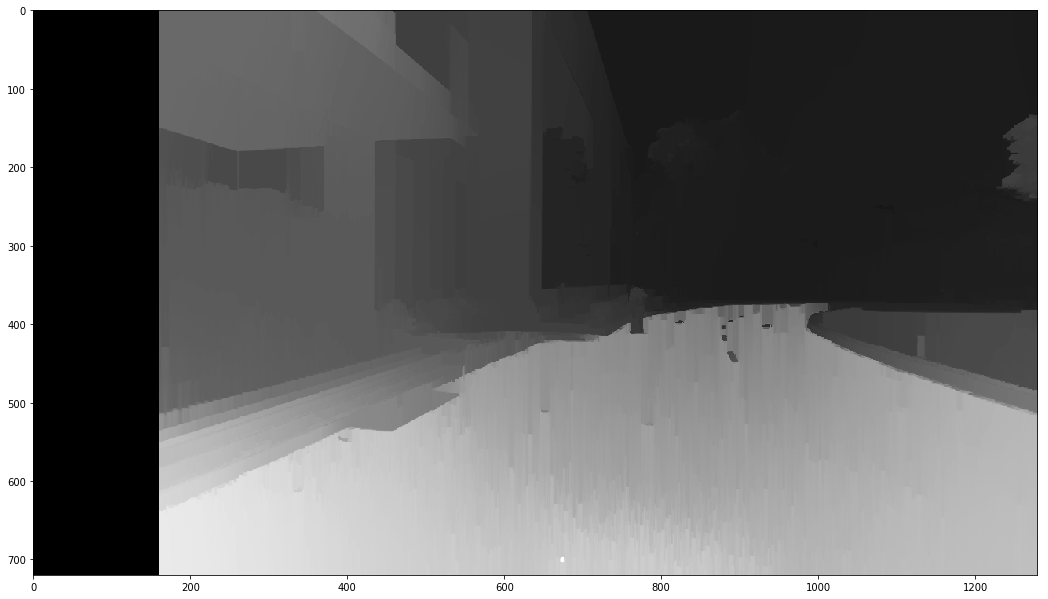

In [133]:

filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)
plt.figure(figsize=(18,12))
plt.imshow(filteredImg, 'gray')


In [119]:
filteredImg[200,800]

27

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


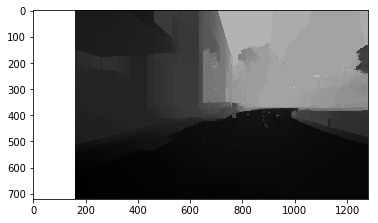

In [120]:
%matplotlib inline 
f = 1400
b = 120

D = (b * f) / filteredImg
plt.imshow(D, 'gray')

In [132]:
# cv2.stereoRectifyUncalibrated(imgL, imgR, 120, (imgL.shape[1],imgL.shape[1]))
# cv2.reprojectImageTo3D(filteredImg)
disparity = imgR - imgL
fx_l = 1200
Baseline = 120
Z = (fx_l * Baseline) / (-disparity)
X = (col_l - cx_l) * Z / fx_l
Y = (row_l - cy_l) * Z / fy_l

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


NameError: name 'col_l' is not defined